<a href="https://colab.research.google.com/github/Plutooooo/hku_phys3151_2022/blob/main/multivariate-linear-regression/to_model_and_reveal_the_force_of_gravity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using polynomial regression to model and reveal the force of gravity

We will take a look at a simple example: the force of gravity on a falling object. The formula for the location of a falling object is:

\begin{eqnarray}
y=X_{0}+V_{0}t-\frac{1}{2}gt^{2}
\end{eqnarray}

where $X_{0}$ is the initial location of the object, i.e. its initial height.
$V_{0}$ is the initial velocity (or speed) of the object when it is at this initial position. $t$ is the time after the object was dropped. $g$ is the force of gravity, which is an acceleration of approximately 9.8 $m/s^{2}$. This is actually a constant not a variable like all of the others (unless we are dropping an object on different planets, which are not). It is negative because the force of gravity is downward, from a positive location value toward zero.

First, we will create a Python function to calculate the location of a falling object

In [1]:
def location(x_0, v_0, t):
    return x_0 + v_0*t - (9.8/2)*t**2

Next, we use this function to create a dataset and save it in a CSV file

In [2]:
import csv
import random
import math
random.seed
with open('gravity_location_data.csv', mode='w') as gravity_file:
    gravity_writer = csv.writer(gravity_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    gravity_writer.writerow(['initial_position', 'initial_velocity', 'mass', 'time', 'location'])
    for i in range (0, 10000):
        initial_position = random.uniform(0,1)
        initial_velocity = random.uniform(0,1)
        mass = random.uniform(0,1)
        time = random.uniform(0,1)
        gravity_writer.writerow([initial_position, initial_velocity, mass, time, location(initial_position, initial_velocity, time)])

What we are doing here is creating 10,000 examples, using randomized values for all of our variables, then calculating the location at a certain (randomly selected) time.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/content/gravity_location_data.csv')
print(df)

      initial_position  initial_velocity      mass      time  location
0             0.683255          0.625416  0.961955  0.689871 -1.217307
1             0.567541          0.176405  0.686904  0.362317 -0.011785
2             0.643994          0.755164  0.090814  0.654675 -0.961757
3             0.074788          0.129791  0.497255  0.291631 -0.304100
4             0.185041          0.810707  0.293577  0.439207 -0.404115
...                ...               ...       ...       ...       ...
9995          0.276105          0.632381  0.090042  0.540624 -0.814160
9996          0.861143          0.566950  0.893897  0.129493  0.852394
9997          0.388516          0.004476  0.784135  0.985617 -4.367130
9998          0.042918          0.475465  0.351846  0.493969 -0.917844
9999          0.416736          0.748529  0.509820  0.857941 -2.547776

[10000 rows x 5 columns]


In [4]:
df['initial_velocity_time']=df['initial_velocity']*df['time']
df['time^2']=df['time']*df['time']
print(df)

      initial_position  initial_velocity  ...  initial_velocity_time    time^2
0             0.683255          0.625416  ...               0.431457  0.475922
1             0.567541          0.176405  ...               0.063914  0.131274
2             0.643994          0.755164  ...               0.494387  0.428600
3             0.074788          0.129791  ...               0.037851  0.085049
4             0.185041          0.810707  ...               0.356068  0.192903
...                ...               ...  ...                    ...       ...
9995          0.276105          0.632381  ...               0.341880  0.292275
9996          0.861143          0.566950  ...               0.073416  0.016768
9997          0.388516          0.004476  ...               0.004412  0.971440
9998          0.042918          0.475465  ...               0.234865  0.244005
9999          0.416736          0.748529  ...               0.642194  0.736062

[10000 rows x 7 columns]


Next, we scale the data

In [5]:
df = df.to_numpy()
x = [df[:,0],df[:,5],df[:,6]]
y = [df[:,4]]
x = np.array(x)
#print(x)
x = x.T
y = np.array(y)
y = y.T
#print(y)

Now, we define functions for cost funciton and gradient descent.

In [6]:
def  computeCost(theta,X,y):
    m = float(len(y))
    
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions-y))
    return cost

In [7]:
def gradient_descent(X,y,theta,alpha,iterations):
    m = float(len(y))
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,3))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        theta = theta -(1/m)*alpha*( X.T.dot((prediction - y)))
        theta_history[it,:] = theta.T
        cost_history[it]  = computeCost(theta,X,y)
        
    return theta, cost_history, theta_history

[[0.55617778]
 [0.47603529]
 [1.92502933]]
3.757585030346268
Theta0:          1.000,
Theta1:          1.000,
Theta2:          -4.900
Final cost/MSE:  0.000


Text(0.5, 1.0, 'Cost function using Gradient Descent')

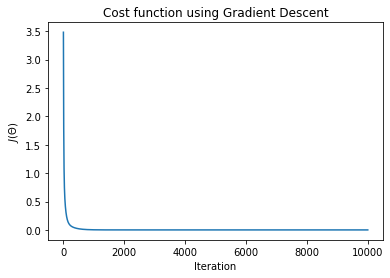

In [14]:
alpha =0.1
n_iter = 10000

theta = np.random.randn(3,1)
print(theta)

print(computeCost(theta,x,y))

theta,cost_history,theta_history = gradient_descent(x,y,theta,alpha,n_iter)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f},\nTheta2:          {:0.3f}'.format(theta[0][0],theta[1][0],theta[2][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Now that we have our data in a CSV file, we import it

In [15]:
import pandas as pd
gravity_data = pd.read_csv('gravity_location_data.csv')
df_location = pd.DataFrame(gravity_data)

This data will not actually be linear but scitkit-learn gives us the ability modify the data so that it can be trained as a LinearRegression model, while taking into account that it is actually a polynomial.

In [16]:
from sklearn.model_selection import train_test_split
def split_data(data, target_name):
    y = data[target_name]
    X = data.drop(target_name, axis=1)
    return train_test_split(X, y, test_size=0.2, random_state=30)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
def train_eval_poly(X_train, X_test, y_train, y_test):
    regression_model = LinearRegression() 
    
    poly = PolynomialFeatures(degree=2)
    X_train_transform = poly.fit_transform(X_train)
    X_test_transform = poly.fit_transform(X_test)
    
    regression_model.fit(X_train_transform, y_train)
    
    print(poly.fit(X_train).get_feature_names_out(X_train.columns))
    
    y_pred = regression_model.predict(X_test_transform)
    print("R2: \t", r2_score(y_test, y_pred))
    print("RMSE: \t", sqrt(mean_squared_error(y_test, y_pred)))
    print("MAE: \t", mean_absolute_error(y_test, y_pred))
    
    return regression_model

Now we train the model with this code


In [18]:
df_split = split_data(df_location, 'location')
lrModel = train_eval_poly(*df_split)

['1' 'initial_position' 'initial_velocity' 'mass' 'time'
 'initial_position^2' 'initial_position initial_velocity'
 'initial_position mass' 'initial_position time' 'initial_velocity^2'
 'initial_velocity mass' 'initial_velocity time' 'mass^2' 'mass time'
 'time^2']
R2: 	 1.0
RMSE: 	 5.969523414225096e-15
MAE: 	 5.706584944170645e-15


Note that the $R^{2}$ value is 1.0. Also, the root mean squared error (RMSE) and mean absolute error (MAE) are tiny. At this scale that is minuscule, essentially zero.

Now let’s look at the exponents on our model, which are the exponents on the polynomial equation the model is using to make predictions

In [19]:
lrModel.coef_

array([ 0.00000000e+00,  1.00000000e+00, -3.92741395e-15, -1.91513472e-15,
        2.21177243e-16, -3.93435284e-15,  6.45317133e-15, -3.62904151e-15,
       -2.31065167e-15,  1.19348975e-15,  7.49400542e-16,  1.00000000e+00,
        1.24900090e-16,  2.49800181e-16, -4.90000000e+00])

This gives us coefficients correspond to each of the fifteen features from above. The first value (0.00000000e+00, or 0) is the coefficient for the value 1. That would be hanging constant with no variable, a constant value always added to the equation, except that the coefficient is zero so there is no constant value added to our result. The second value from our array ( 1.00000000e+00, or 1) is the coefficient on “initial_position.” And in fact, in our original equation, we have the initial velocity ($X_{0}$) with a coefficient of one.

<br>

Most of our other coefficients are essentially zero, and tell us that these factors are irrelevant to predicting the location, but we do have a few that are not. The twelfth in our list is also a coefficient of 1, which corresponds to ‘initial_velocity time,’ or initial velocity multiplied by time. Again, we have this factor in our original equation, which appears as $V_{0}t$.

<br>

Finally, the very last value is -4.9, which is the coefficient corresponding to ‘time ^ 2.’ Note that this also appears in our original equation as $\frac{1}{2}gt^{2}$. But we said earlier that $g$ is approximately 9.8, and $-\frac{1}{2} * 9.8 = -4.9$. So this also corresponds with our original equation.

<br>

There are two very interesting final points to be made here. First, the resulting model found the mass to be irrelevant to making the prediction, which is correct. Second, the machine learning algorithm was able to derive the gravitational acceleration constant g, or at least determine the value of the entire coefficient $(-\frac{1}{2} * 9.8)$ which includes $g$.